In [21]:
! git clone https://github.com/DS3001/group10/

fatal: destination path 'group10' already exists and is not an empty directory.


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#target variable y is stroke (1 - yes, 0 - no)
#features of interests are 'smoking_status', 'residence_type', 'hypertension','heart_disease'
#treating it as clusters

In [23]:
#Importing data
df_test = pd.read_csv('/content/group10/project_2/data/testing_data.csv')
df = pd.read_csv('/content/group10/project_2/data/training_data.csv') #training set

In [24]:
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2465,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,4311,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,2375,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,5017,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,753,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [25]:
####Analyzing and Cleaning Data###

#Dropping unecessary data
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('id', axis = 1)
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)

In [26]:
#Check data types
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [27]:
#Checking NAs
missing_values = df.isnull().sum()
print(missing_values) #there is 159 NAs for BMI

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64


In [28]:
#Smoking status
df['smoking_status'].unique()
#drop unknown rows
df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = np.nan
df = df.dropna()
df['smoking_status'].unique()

df_test.loc[df_test['smoking_status'] == 'Unknown', 'smoking_status'] = np.nan
df_test = df_test.dropna()

In [29]:
#clean residence type
df['Residence_type'].unique() #pretty clean

array(['Urban', 'Rural'], dtype=object)

In [30]:
#clean hypertension and heart disease
df['hypertension'].unique()
df['heart_disease'].unique() #pretty clean

array([0, 1])

In [31]:
#making dummy values for smoking status and residence type
df['smoking_status'] = df['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2})
df['Residence_type'] = df['Residence_type'].replace({"Urban":0, "Rural":1})

df_test['smoking_status'] = df_test['smoking_status'].replace({"never smoked": 0, "formerly smoked": 1, "smokes": 2})
df_test['Residence_type'] = df_test['Residence_type'].replace({"Urban": 0, "Rural": 1})

<ipython-input-31-355ca22309ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2})
<ipython-input-31-355ca22309ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type'] = df['Residence_type'].replace({"Urban":0, "Rural":1})
<ipython-input-31-355ca22309ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [32]:
X_train = df.loc[:, ['hypertension', 'heart_disease', 'Residence_type', 'smoking_status', 'stroke']]
X_test = df_test.loc[:, ['hypertension', 'heart_disease', 'Residence_type', 'smoking_status', 'stroke']]
print(X_test)

      hypertension  heart_disease  Residence_type  smoking_status  stroke
0                1              0               0               0       0
2                0              0               1               1       0
4                1              0               0               0       0
6                0              1               0               1       0
7                0              0               1               0       0
...            ...            ...             ...             ...     ...
1012             1              1               0               1       1
1015             0              0               0               0       1
1016             0              0               0               0       1
1019             0              0               0               0       1
1021             0              0               1               1       1

[693 rows x 5 columns]


In [33]:
###Getting Model Started###

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

y_train = X_train['stroke']
y_test = X_test['stroke'] #target variable

X_train = X_train.apply(maxmin) # Normalize the data
X_test = X_test.apply(maxmin)

print(X_train)

      hypertension  heart_disease  Residence_type  smoking_status  stroke
0              0.0            0.0             0.0             0.5     0.0
1              0.0            0.0             1.0             0.0     0.0
3              0.0            0.0             0.0             0.0     0.0
5              0.0            0.0             0.0             1.0     0.0
6              1.0            1.0             0.0             0.0     0.0
...            ...            ...             ...             ...     ...
4082           0.0            0.0             0.0             0.0     1.0
4083           1.0            0.0             1.0             0.5     1.0
4084           0.0            0.0             1.0             0.0     1.0
4085           1.0            1.0             0.0             1.0     1.0
4086           0.0            0.0             0.0             0.5     1.0

[2733 rows x 5 columns]


[ 1  2  3  4  5  6  7  8  9 10 11 13 17 18 19 20 21 22 23 24 25 26]


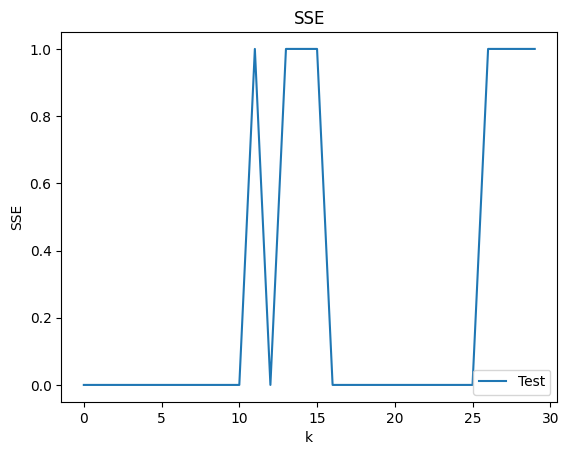

In [34]:
###Create SSE Plot###
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

In [42]:
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set

pd.crosstab(y_test, y_hat)

col_0,0,1
stroke,,
0,660,0
1,0,33


In [40]:
r_squared = r2_score(y_test, y_hat)
print(f'R-squared: {r_squared}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(f'Root Mean Squared Error (RMSE): {rmse}')

R-squared: 0.9681818181818181
Root Mean Squared Error (RMSE): 0.037986858819879316
